In [1]:
import mtt
import numpy as np
from copy import copy, deepcopy

In [2]:
# Default simulation values
obj1 = np.array([[0], [0], [1], [1]])
obj2 = np.array([[1], [1], [1], [1]])
initial = {0: obj1}
dt = 1
ep_normal = 1
ep_tangent = 1
nu = 1
ts = 6
miss_p = 0.01
lam = 0.01
fa_scale = 10
gen = mtt.MultiObjSimple(initial, dt, ep_tangent, ep_normal, nu)
params = gen.get_params()
P = params.pop("P")

In [3]:
params

{'f': <bound method MultiObjSimple.process_function of <mtt.multiobject_simple.MultiObjSimple object at 0x13ea7ac70>>,
 'A': <bound method MultiObjSimple.process_jacobian of <mtt.multiobject_simple.MultiObjSimple object at 0x13ea7ac70>>,
 'h': <bound method MultiObjSimple.measurement_function of <mtt.multiobject_simple.MultiObjSimple object at 0x13ea7ac70>>,
 'Q': array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 'W': <bound method MultiObjSimple.W of <mtt.multiobject_simple.MultiObjSimple object at 0x13ea7ac70>>,
 'R': array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 'H': array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])}

In [4]:
k = mtt.KalmanFilter(**params)

In [5]:
xt, P = k.time_update(obj1, P)
k.measurement_update(xt, P, obj2)

(array([[1.],
        [1.],
        [1.],
        [1.]]),
 array([[ 6.25000000e-01,  1.58539631e-19,  1.25000000e-01,
         -4.75618892e-19],
        [ 1.58539631e-19,  6.25000000e-01, -4.75618892e-19,
          1.25000000e-01],
        [ 1.25000000e-01, -4.75618892e-19,  6.25000000e-01,
          1.42685668e-18],
        [-4.75618892e-19,  1.25000000e-01,  1.42685668e-18,
          6.25000000e-01]]))

In [6]:
gate = mtt.DistanceGatingMHT(0.9)

tot = -1000
tmm = -2000
tnt = -3000
main = mtt.TrackMaintenanceMHT(tot, tmm, tnt, 1-miss_p, 4, lam, params['R'], k)
hypo = mtt.HypothesisComp()
prune = mtt.Pruning(4)

tracker = mtt.MHTTracker(k, gate, main, hypo, prune)

In [7]:
tracker.measurements

[]

In [8]:
# test = np.zeros(4)
# test.shape = (4,1)
# tracker.predict([test])

In [9]:
tracker.tracks

[]

In [10]:
tracker.get_trajectories()

[]

In [11]:
tracker.tracks

[]

In [12]:
processes = dict()
measures = dict()
measure_colors = dict()
cur_seed = np.random.randint(10**7)
rng = np.random.default_rng(cur_seed)
process = gen.process(20, rng)
processes[len(processes.keys())] = process
measures[len(measures.keys())], measure_colors[len(measure_colors.keys())] = gen.measure(process, rng)
# print(processes[0])

number of tracks:  1
NODES:  1
measurement:  [[-0.56303922]
 [ 2.10373759]
 [ 1.1412091 ]
 [-0.83034379]]
number of tracks:  3
NODES:  3
measurement:  [[3.51543678]
 [0.91246731]
 [1.85307836]
 [0.62752239]]
measurement:  [[3.51543678]
 [0.91246731]
 [1.85307836]
 [0.62752239]]
measurement:  [[3.51543678]
 [0.91246731]
 [1.85307836]
 [0.62752239]]
number of tracks:  6
NODES:  6
measurement:  [[4.88172476]
 [1.90972129]
 [2.01738453]
 [2.11673376]]
measurement:  [[4.88172476]
 [1.90972129]
 [2.01738453]
 [2.11673376]]
measurement:  [[4.88172476]
 [1.90972129]
 [2.01738453]
 [2.11673376]]
measurement:  [[4.88172476]
 [1.90972129]
 [2.01738453]
 [2.11673376]]
measurement:  [[4.88172476]
 [1.90972129]
 [2.01738453]
 [2.11673376]]
measurement:  [[4.88172476]
 [1.90972129]
 [2.01738453]
 [2.11673376]]
number of tracks:  12
NODES:  12
measurement:  [[10.33168721]
 [ 2.05238747]
 [ 4.78725202]
 [ 0.58924555]]
measurement:  [[10.33168721]
 [ 2.05238747]
 [ 4.78725202]
 [ 0.58924555]]
measuremen

/Users/eduardososa/projects/python/rips-2021-aerospace/mtt/mht/distances_mht.py:25: RuntimeWarning: invalid value encountered in sqrt
  dis = np.sqrt(innovation.T @ np.linalg.inv(K) @ innovation)


NODES:  22
measurement:  [[16.25843167]
 [ 7.73107434]
 [ 5.715559  ]
 [ 1.93694509]]
measurement:  [[16.25843167]
 [ 7.73107434]
 [ 5.715559  ]
 [ 1.93694509]]
measurement:  [[16.25843167]
 [ 7.73107434]
 [ 5.715559  ]
 [ 1.93694509]]
measurement:  [[16.25843167]
 [ 7.73107434]
 [ 5.715559  ]
 [ 1.93694509]]
measurement:  [[16.25843167]
 [ 7.73107434]
 [ 5.715559  ]
 [ 1.93694509]]
measurement:  [[16.25843167]
 [ 7.73107434]
 [ 5.715559  ]
 [ 1.93694509]]
measurement:  [[16.25843167]
 [ 7.73107434]
 [ 5.715559  ]
 [ 1.93694509]]
measurement:  [[16.25843167]
 [ 7.73107434]
 [ 5.715559  ]
 [ 1.93694509]]
measurement:  [[16.25843167]
 [ 7.73107434]
 [ 5.715559  ]
 [ 1.93694509]]
measurement:  [[16.25843167]
 [ 7.73107434]
 [ 5.715559  ]
 [ 1.93694509]]
measurement:  [[16.25843167]
 [ 7.73107434]
 [ 5.715559  ]
 [ 1.93694509]]
measurement:  [[16.25843167]
 [ 7.73107434]
 [ 5.715559  ]
 [ 1.93694509]]
measurement:  [[16.25843167]
 [ 7.73107434]
 [ 5.715559  ]
 [ 1.93694509]]
measurement:  

 [1.65413359e-02]]
measurement:  [[3.86417547e+01]
 [1.00841358e+01]
 [4.31018988e+00]
 [1.65413359e-02]]
number of tracks:  36
NODES:  36
measurement:  [[42.41070842]
 [ 8.0536311 ]
 [ 6.08390032]
 [-0.63764204]]
measurement:  [[42.41070842]
 [ 8.0536311 ]
 [ 6.08390032]
 [-0.63764204]]
measurement:  [[42.41070842]
 [ 8.0536311 ]
 [ 6.08390032]
 [-0.63764204]]
measurement:  [[42.41070842]
 [ 8.0536311 ]
 [ 6.08390032]
 [-0.63764204]]
measurement:  [[42.41070842]
 [ 8.0536311 ]
 [ 6.08390032]
 [-0.63764204]]
measurement:  [[42.41070842]
 [ 8.0536311 ]
 [ 6.08390032]
 [-0.63764204]]
measurement:  [[42.41070842]
 [ 8.0536311 ]
 [ 6.08390032]
 [-0.63764204]]
measurement:  [[42.41070842]
 [ 8.0536311 ]
 [ 6.08390032]
 [-0.63764204]]
measurement:  [[42.41070842]
 [ 8.0536311 ]
 [ 6.08390032]
 [-0.63764204]]
measurement:  [[42.41070842]
 [ 8.0536311 ]
 [ 6.08390032]
 [-0.63764204]]
measurement:  [[42.41070842]
 [ 8.0536311 ]
 [ 6.08390032]
 [-0.63764204]]
measurement:  [[42.41070842]
 [ 8.05

number of tracks:  45
NODES:  45
measurement:  [[61.97001452]
 [ 8.7775769 ]
 [ 4.90094301]
 [-1.32836713]]
measurement:  [[61.97001452]
 [ 8.7775769 ]
 [ 4.90094301]
 [-1.32836713]]
measurement:  [[61.97001452]
 [ 8.7775769 ]
 [ 4.90094301]
 [-1.32836713]]
measurement:  [[61.97001452]
 [ 8.7775769 ]
 [ 4.90094301]
 [-1.32836713]]
measurement:  [[61.97001452]
 [ 8.7775769 ]
 [ 4.90094301]
 [-1.32836713]]
measurement:  [[61.97001452]
 [ 8.7775769 ]
 [ 4.90094301]
 [-1.32836713]]
measurement:  [[61.97001452]
 [ 8.7775769 ]
 [ 4.90094301]
 [-1.32836713]]
measurement:  [[61.97001452]
 [ 8.7775769 ]
 [ 4.90094301]
 [-1.32836713]]
measurement:  [[61.97001452]
 [ 8.7775769 ]
 [ 4.90094301]
 [-1.32836713]]
measurement:  [[61.97001452]
 [ 8.7775769 ]
 [ 4.90094301]
 [-1.32836713]]
measurement:  [[61.97001452]
 [ 8.7775769 ]
 [ 4.90094301]
 [-1.32836713]]
measurement:  [[61.97001452]
 [ 8.7775769 ]
 [ 4.90094301]
 [-1.32836713]]
measurement:  [[61.97001452]
 [ 8.7775769 ]
 [ 4.90094301]
 [-1.328

number of tracks:  53
NODES:  53
measurement:  [[76.80989106]
 [ 2.73213183]
 [ 5.92319837]
 [-2.15017222]]
measurement:  [[76.80989106]
 [ 2.73213183]
 [ 5.92319837]
 [-2.15017222]]
measurement:  [[76.80989106]
 [ 2.73213183]
 [ 5.92319837]
 [-2.15017222]]
measurement:  [[76.80989106]
 [ 2.73213183]
 [ 5.92319837]
 [-2.15017222]]
measurement:  [[76.80989106]
 [ 2.73213183]
 [ 5.92319837]
 [-2.15017222]]
measurement:  [[76.80989106]
 [ 2.73213183]
 [ 5.92319837]
 [-2.15017222]]
measurement:  [[76.80989106]
 [ 2.73213183]
 [ 5.92319837]
 [-2.15017222]]
measurement:  [[76.80989106]
 [ 2.73213183]
 [ 5.92319837]
 [-2.15017222]]
measurement:  [[76.80989106]
 [ 2.73213183]
 [ 5.92319837]
 [-2.15017222]]
measurement:  [[76.80989106]
 [ 2.73213183]
 [ 5.92319837]
 [-2.15017222]]
measurement:  [[76.80989106]
 [ 2.73213183]
 [ 5.92319837]
 [-2.15017222]]
measurement:  [[76.80989106]
 [ 2.73213183]
 [ 5.92319837]
 [-2.15017222]]
measurement:  [[76.80989106]
 [ 2.73213183]
 [ 5.92319837]
 [-2.150

number of tracks:  59
NODES:  59
measurement:  [[90.86047745]
 [-0.8282528 ]
 [ 4.60876715]
 [-0.11665162]]
measurement:  [[90.86047745]
 [-0.8282528 ]
 [ 4.60876715]
 [-0.11665162]]
measurement:  [[90.86047745]
 [-0.8282528 ]
 [ 4.60876715]
 [-0.11665162]]
measurement:  [[90.86047745]
 [-0.8282528 ]
 [ 4.60876715]
 [-0.11665162]]
measurement:  [[90.86047745]
 [-0.8282528 ]
 [ 4.60876715]
 [-0.11665162]]
measurement:  [[90.86047745]
 [-0.8282528 ]
 [ 4.60876715]
 [-0.11665162]]
measurement:  [[90.86047745]
 [-0.8282528 ]
 [ 4.60876715]
 [-0.11665162]]
measurement:  [[90.86047745]
 [-0.8282528 ]
 [ 4.60876715]
 [-0.11665162]]
measurement:  [[90.86047745]
 [-0.8282528 ]
 [ 4.60876715]
 [-0.11665162]]
measurement:  [[90.86047745]
 [-0.8282528 ]
 [ 4.60876715]
 [-0.11665162]]
measurement:  [[90.86047745]
 [-0.8282528 ]
 [ 4.60876715]
 [-0.11665162]]
measurement:  [[90.86047745]
 [-0.8282528 ]
 [ 4.60876715]
 [-0.11665162]]
measurement:  [[90.86047745]
 [-0.8282528 ]
 [ 4.60876715]
 [-0.116

NODES:  64


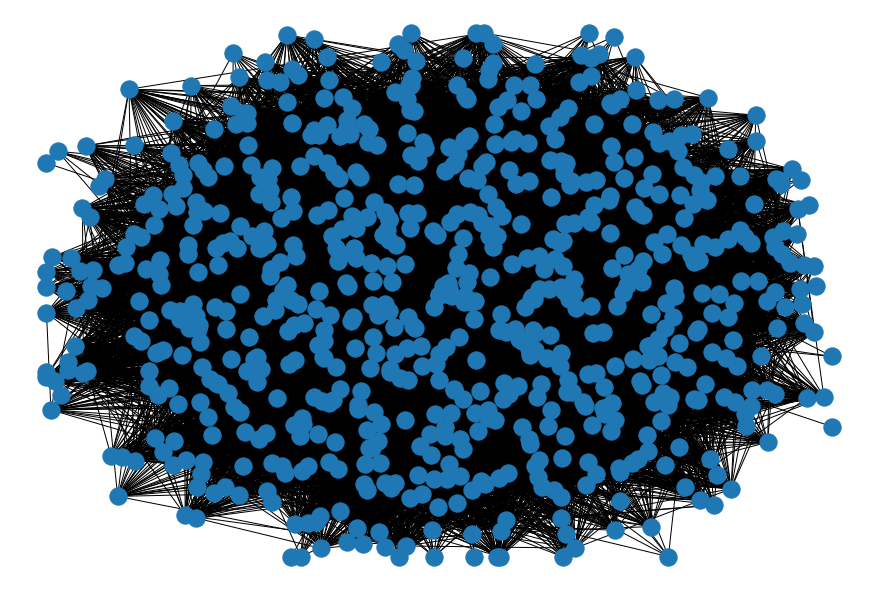

In [13]:
for i in range(len(processes[0])):
    tracker.predict(deepcopy(measures[0][i]))

In [14]:
import networkx as nx
import networkx.algorithms.clique as nxac
g = nx.Graph()
g.add_node(0, weight = 1)
print(nxac.max_weight_clique(g))

([0], 1)
